# Milestone 02 - Refining Models

## Author - Rodolfo Lerma

# Problem

Continue from Milestone 1 to build a Decision Tree, Random Forest and SVC model and compare performance.

# Abstract:

The capstone project focuses on diaper manufacturing quality. Generally, to ensure or predict quality, a diaper manufacturer need s to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc.
For this capstone project, we will use the SECOM manufacturing Data Set from the UCI Machine Learning Repository.

The analysis is is divided the following way:

### Summary from Milestone 01


### Data Formatting
- **Merging Data**
- **Missing Data**
- **Repeated Values (Columns with the same value)**


### Feature Selection


### ML Analysis
- **Split Data and Class Imbalance**
    - Split Data
    - Class Imbalance
- **Hyperparameter Selection**
    - Hyperparameter Settings for the `Decision Tree` Model
    - Hyperparameter Settings for the `Random Forest` Model
    - Hyperparameter Settings for the `SVC` Model
- **Performance Comparison**


### Summary of Models Performance
- **Decision Tree**
- **Random Forest**
- **SVC**

# Summary from Milestone 01

- For this analysis we initially had 590 features + date and the target variable (quality of the diaper as either good or bad). After some cleaning (removing columns with a lot of missing values and columns with the same value repeated in all rows) we ended up with a data frame with 538 features + data + target variable.


- In this case it seems that the `Wrapper` feature selection method is the one offering a better selection to model the quality of the diapers by means of the manufacturing process.


- The class imbalance problem was solved my means of re-sampling.

| Target | -1 | 1294 |
| --- | --- | --- |
| Target | 1 | 99 |

# Data Formatting

## Merging Data

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Load File
filename = 'secom.data'
filename2 = 'secom_labels.data'
data = pd.read_csv(filename,header=None, sep = '\s+')
others = pd.read_csv(filename2,header=None,sep = '\s+')

In [3]:
others.columns = ['target', 'date']
df = pd.concat([others,data], axis = 1)
df['date']= pd.to_datetime(df['date'])

## Missing Data

In [4]:
missing_values = []
my_list = df.columns.values.tolist()
y = df.shape
for i in my_list:
    x = df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

As before if more than 15% of data is missing in a column that column would be dropped from this data set at this moment. For other columns with missing data is present depending on how much data is missing is going to be either dropped or imputed.

In [5]:
missing_columns_names = []
for key, value in columns_missing.items():
    if value > 240: #15% of the data
        x = key
        missing_columns_names.append(x)

Those columns would be eliminated from the data set, since most of the values are missing.

In [6]:
df = df.drop(missing_columns_names, axis = 1)
df = df.dropna()

For this analysis since removing missing data would only take 10% of the available data, those raws are going to be remove. If by removing missing data more than 15% were to be removed other methods would have been explored as: substitution.
Even at this moment having 540 variables/features is to much to explore and obtain meaninful results, therefore more work has to be done.

### Repeated Values (Columns with the same value)

In [7]:
not_repeated = []
repeated = []
updated_columns = df.columns.values.tolist()
y = df.shape
for i in updated_columns[2:]:
    x = df[i].std()
    if x == 0:
        repeated.append(i)
    else:
        not_repeated.append(i)
df = df.drop(repeated, axis = 1)

categorical = []
numerical = []
updated_columns = df.columns.values.tolist()
y = df.shape
for i in updated_columns:
    x = df[i].dtypes
    if x == object:
        categorical.append(i)
    else:
        numerical.append(i)

Thru the code above the data was checked to see if there was any variable that could be considered as categorical (also this helped to checked any column with incorrect values)

# Feature Selection

From Milestone 01 it was seen that the best Features where does coming from the `Wrapper` Method. For more details on this comparison see **Milestone 01** analysis.

In [8]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, 50, step=1)

df_numeric = df[numerical]
df_numeric = df_numeric.drop('date', axis = 1)

df_numeric_copy = df_numeric.copy()

target = df_numeric.iloc[:,0]#This is the selection of the Target Variables
df_updated = df_numeric_copy.drop('target', axis='columns')

lol = df_updated.values.tolist()
selector = selector.fit(lol, target)

boolean_values = selector.support_
ranking_values = selector.ranking_
wrapper_columns = df_updated.columns.values.tolist()

#Selection of the features with ranking 1
selected_features = []
unselected_features = []
for i in range(len(wrapper_columns)):
    w = boolean_values[i]
    if w == True:
        b = wrapper_columns[i]
        selected_features.append(b)
    else:
        v = wrapper_columns[i]
        unselected_features.append(v)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


# ML Analysis

## Split Data and Class Imbalance

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

tr = df.iloc[:,0].tolist()
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b < 0:
        n = 0
    else:
        n = 1
    binomial.append(n)
df['target_binomial'] = binomial

### Split Data

In [10]:
#Split the data for variables with high mi value
label = df['target_binomial']
variables = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(variables, label, test_size=0.30, random_state=42)

### Class Imbalance

In [11]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

variables_sm, label_sm = sm.fit_resample(variables, label)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(variables_sm, label_sm, test_size=0.30, random_state=42)

In summary the variables that are going to be input to the model are:
- Training:
    - `X_train_sm`
    - `y_train_sm`
    
    
- Testing:
    - `X_test`
    - `y_test`

## Hyperparameter Selection

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm, metrics
from sklearn.metrics import classification_report

### Hyperparameter Settings for the `Decision Tree` Model

In [13]:
max_depth_options = [2,3,4,5,6,7,8,9,10]
min_sample_options = [2,3,4,5,6,7,8,9,10]
model_criterion = ['entropy', 'gini']
min_samples_leaf_options = [2,3,4,5,6,7,8,9,10]

dt_grid = {'criterion': model_criterion, 
           'max_depth': max_depth_options,
           'min_samples_split':min_sample_options,
           'min_samples_leaf':min_samples_leaf_options}

dt_base = DecisionTreeClassifier()

decision_trees_hyper = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
decision_trees_hyper.fit(X_train_sm, y_train_sm)

x = decision_trees_hyper.best_params_
x

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'entropy'}

### Hyperparameter Settings for the `Random Forest` Model

In [14]:
n_estimators_options = [10,20,30,40,50,60,70,80,90,100]

rf_grid = {'criterion': model_criterion,
           'n_estimators':n_estimators_options, 
           'max_depth': max_depth_options,
           'min_samples_split':min_sample_options,
           'min_samples_leaf':min_samples_leaf_options}

rf_base = RandomForestClassifier()

random_forest_hyper = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
random_forest_hyper.fit(X_train_sm, y_train_sm)

y = random_forest_hyper.best_params_
y

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'n_estimators': 70,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'gini'}

### Hyperparameter Settings for the `SVC` Model

Getting a smaller sample as this is computationally expensive.

In [15]:
df_svc_all = df.copy()
df_svc = df_svc_all.sample(frac = 0.85)
label_svc = df_svc['target_binomial']
variables_svc = df_svc[selected_features]

variables_svc_sm, label_svc_sm = sm.fit_resample(variables_svc, label_svc)

X_train_svc_sm, X_test_svc_sm, y_train_svc_sm, y_test_svc_sm = train_test_split(variables_svc_sm, label_svc_sm, test_size=0.30, random_state=42)

In [16]:
kernel_options = ['linear','rbf', 'sigmoid']
cost_options = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
gamma_options = ['scale', 'auto']
degree_options = [3,4,5,6,7,8,10,15]

svc_grid = {'kernel': kernel_options, 
           'C': cost_options,
           'gamma':gamma_options,
           'degree':degree_options}

svc_base = svm.SVC()

svc_hyper = RandomizedSearchCV(estimator = svc_base, param_distributions = svc_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
svc_hyper.fit(X_train_svc_sm, y_train_svc_sm)

z = svc_hyper.best_params_
z

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 1.3}

In [17]:
# kernel_options = ['linear','poly']
# cost_options = [0.9, 1.0, 1.1]
# gamma_options = ['scale', 'auto']
# degree_options = [3,4,5]

# svc_grid = {'kernel': kernel_options, 
#            'C': cost_options,
#            'gamma':gamma_options,
#            'degree':degree_options}

# svc_base = svm.SVC()

# svc_hyper = RandomizedSearchCV(estimator = svc_base, param_distributions = svc_grid, 
#                                n_iter = 100, cv = 3, verbose = 2, random_state = 42, 
#                                n_jobs = -1)

# # Fit the random search model
# svc_hyper.fit(X_train_svc_sm, y_train_svc_sm)

# z = svc_hyper.best_params_
# z

## Performance Comparison

In [18]:
def perfomance_values(T,Y,header):
    print("Classifier: ", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    print (" ")
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.values.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        allvalues = [AR, ER, P, R, F1]
    #return allvalues

    names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
    list_of_values = [accuracy_rate, error_rate, precision, recall, f1_score]
    colors = ['lightseagreen', 'tomato', 'darkmagenta', 'crimson', 'olive']
    
    #Plots of each of the Performance Values for each of the Classifiers in this analysis
    for i in range(len(names)):
        plt.bar(header, list_of_values[i], color=colors[i])
        plt.xticks(rotation=45)
        plt.title(names[i])
        plt.ylabel("Score")
        plt.show()

In [19]:
#Classifiers
dt = DecisionTreeClassifier(criterion=x['criterion'], max_depth = x['max_depth'], min_samples_split = x['min_samples_split'], min_samples_leaf = x['min_samples_leaf'])
rf = RandomForestClassifier(n_estimators = y['n_estimators'], criterion = y['criterion'], max_depth = y['max_depth'], min_samples_split = y['min_samples_split'], min_samples_leaf = y['min_samples_leaf'])
svc1 = svm.SVC(gamma='scale', kernel = 'linear', C = 0.9, degree = 3, probability=True)
svc2 = svm.SVC(gamma='auto', kernel = 'sigmoid', C = 1.1, degree = 4, probability=True)
svc3 = svm.SVC(gamma='scale', kernel = 'poly', C = 0.9, degree = 3, probability=True)
svc4 = svm.SVC(gamma='auto', kernel = 'rbf', C = 1.2, degree = 4, probability=True)
svc5 = svm.SVC(probability=True)
svc = svm.SVC(gamma=z['gamma'], kernel = z['kernel'], C = z['C'], degree = z['degree'], probability=True)

#List for Classifiers and Names
header = ["Decision_Tree","Random_Forest", "SVC1",'SVC2','SVC3','SVC4','SVC5','SVC']
V = [dt, rf, svc1, svc2, svc3, svc4, svc5, svc]

Classifier:  Decision_Tree

Accuracy: 0.8182 ,Error Rate: 0.1818 ,Precision: 0.9816 ,Recall: 0.8205 ,F1 Score: 0.8939
 
Classifier:  Random_Forest

Accuracy: 0.9737 ,Error Rate: 0.0263 ,Precision: 0.9897 ,Recall: 0.9821 ,F1 Score: 0.9858
 
Classifier:  SVC1

Accuracy: 0.5335 ,Error Rate: 0.4665 ,Precision: 0.9577 ,Recall: 0.5231 ,F1 Score: 0.6766
 
Classifier:  SVC2

Accuracy: 0.067 ,Error Rate: 0.933 ,Precision: 0.0 ,Recall: 0.0 ,F1 Score: 0.0
 


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  SVC3

Accuracy: 0.067 ,Error Rate: 0.933 ,Precision: 0.0 ,Recall: 0.0 ,F1 Score: 0.0
 


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  SVC4

Accuracy: 0.8876 ,Error Rate: 0.1124 ,Precision: 1.0 ,Recall: 0.8795 ,F1 Score: 0.9359
 
Classifier:  SVC5

Accuracy: 0.067 ,Error Rate: 0.933 ,Precision: 0.0 ,Recall: 0.0 ,F1 Score: 0.0
 


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  SVC

Accuracy: 0.89 ,Error Rate: 0.11 ,Precision: 1.0 ,Recall: 0.8821 ,F1 Score: 0.9373
 


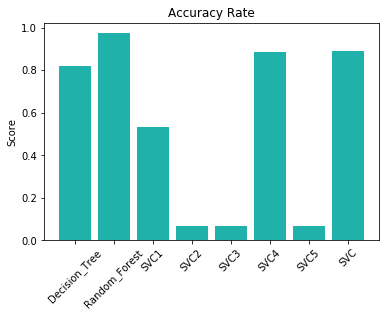

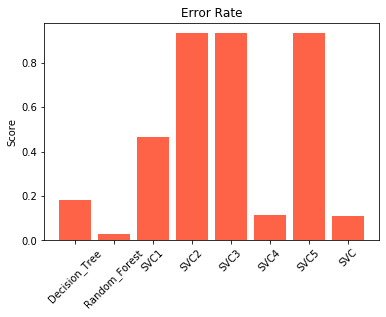

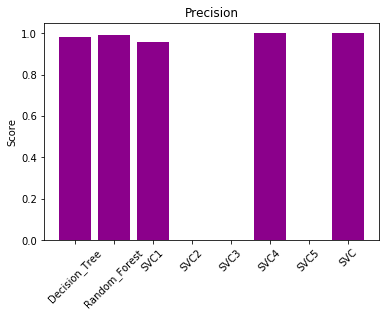

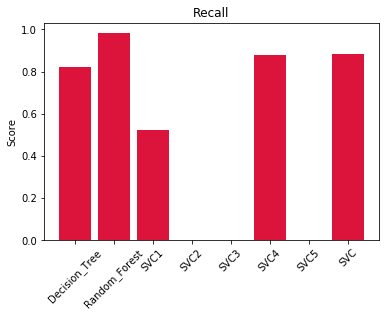

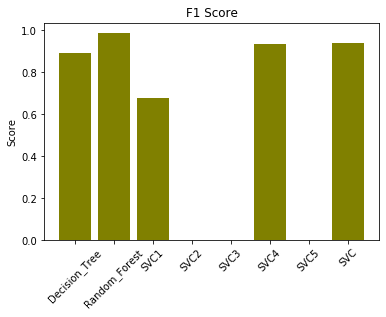

In [20]:
#Running and obtaining performance values from the Models listed above
classifier_performance(V, header, X_train_sm, X_test, y_train_sm, y_test)

# Summary of Models Performance

### Decision Tree

| Performance | Value |
| -- | --|
| Accuracy | 0.8254 |
| Error Rate | 0.1746 |
| Precision | 0.9847 |
| Recall | 0.8256 |
| F1 Score | 0.8982 |


### Random Forest

| Performance | Value |
| -- | --|
| Accuracy | 0.9689 |
| Error Rate | 0.0311 |
| Precision | 0.9871 |
| Recall | 0.9795 |
| F1 Score | 0.9833 |


### SVC

| Performance | Value |
| -- | --|
| Accuracy | 0.7887 |
| Error Rate | 0.2113 |
| Precision | 0.8156 |
| Recall | 0.8845 |
| F1 Score | 0.8487 |

As seen in the tables above the best model is: <br>
using the following Hyperparameters:

# Feedback Request:

1. What is the best way to do a grid search for Hyperparameters for Support Vector Models? In class it was mentioned to use smaller subset of data, if that is used what is a good rule of thumb or guidance on how small the subset can be to still be representative for the entire data?


2. Also as discussed in the Peer Instruction Question for Lesson 07, how can you integrate a decision tree with a SVC model? 